# Лабораторная работа № 3

## Реализация градиентного спуска

Реализуйте линейную регрессию с функцией потерь MSE, обучаемую с помощью:

**Задание 1** Градиентного спуска;

**Задание 2** Стохастического градиентного спуска.


Во всех пунктах необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускается использовать только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):

    * проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
    * достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).
* Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);
* Инициализировать веса можно случайным образом или нулевым вектором.


Ниже приведён шаблон класса, который должен содержать код реализации каждого из методов.

## Формула градиента

Функция потерь в векторном (матричном) виде можно представить следующим образом:

$$Q(w) = \frac{ 1 }{ n } \|X w - y\|^2$$


Тогда производная этой функции будет принимать следующий вид (производная вычисляется как **производная сложной функции**):

$$\frac{ dQ }{ d w }= \frac{ 1 }{ n } (\|X w - y\|^2)' * (X w - y)'  =  \frac{ 1 }{ n } 2(X w -y)X = \frac{ 1 }{ n } 2X(Xw-y)$$

Но, т. к. здесь используются матрицы, то $X$ перед скобками необходимо транспонировать, чтобы было возможным осуществить операцию векторного умножения, нужно соблюсти правило:
> Чтобы матрицу A можно было умножить на матрицу B нужно, чтобы число столбцов матрицы A равнялось числу строк матрицы B.

Поэтому, производная функции потерь будет иметь следующий вид:

$$\frac{ dQ }{ d w }= \frac{ 1 }{ n } 2X^{T}(Xw-y)$$

Т. к. в выражении 1 переменная, то градиент будет выглядеть так:

$$\nabla Q(w) = \frac{ 1 }{ n } 2X^{T}(Xw-y) $$

Подробнее см. раздел 5.3  Линейная регрессия в [Математические методы обучения по прецедентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)

In [1]:
import numpy as np
from sklearn.base import BaseEstimator
from math import floor

class LinearReg(BaseEstimator):
    def __init__(self, gd_type='full',
                 tolerance=10^-6, delta=0.5, max_iter=10000, w0=None, alpha=1e-3, eta=1e-2):
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None
        self.h_prev = 0
        self.delta = delta

    def fit(self, X, y):
        self.loss_history = []
        X = np.array(X)
        y = np.array(y)
        if self.w0 is None:
          # self.w0 = np.zeros(X.shape[1])
          self.w0 = np.random.normal(0, 1, X.shape[1])
        self.w = self.w0
        # self.loss_history.append(self.calc_loss(X, y))

        for _ in range(self.max_iter):
          gradient = self.calc_gradient(X, y)
          pred = self.w
          self.w = pred - (self.eta * gradient)
          loss = self.calc_loss(X, y)
          self.loss_history.append(loss)
          if len(self.loss_history) > 1 and np.linalg.norm(self.w - pred) < self.tolerance:
            break
        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return X @ self.w.T

    def calc_gradient(self, X, y):
        if self.gd_type != 'full':
          idxs = np.random.randint(0, y.size, floor(self.delta*y.size))
          X,y = X[idxs,:],y[idxs]
        res = 2/y.size * (self.predict(X) - y).dot(X) * self.eta
        return res

    def calc_loss(self, X, y):
        return (np.array(self.predict(X) - y)**2).mean()

**Задание 3**.
* Загрузите данные из лабораторной работы № 3 ([train.csv](https://www.kaggle.com/c/nyc-taxi-trip-duration/data));
* Разбейте выборку на обучающую и тестовую в отношении 7:3 с random_seed=0;
* Преобразуйте целевую переменную `trip_duration` как $\hat{y} = \log{(y + 1)}$.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

sns.set(style="darkgrid")




In [3]:
data = pd.read_csv("train.csv")
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [4]:
data = data.drop(columns="dropoff_datetime")
data = data.drop(columns="id")
data


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [5]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
day_to_int = {'Y': 0, 'N': 1}
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map(day_to_int)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   pickup_datetime     1458644 non-null  datetime64[ns]
 2   passenger_count     1458644 non-null  int64         
 3   pickup_longitude    1458644 non-null  float64       
 4   pickup_latitude     1458644 non-null  float64       
 5   dropoff_longitude   1458644 non-null  float64       
 6   dropoff_latitude    1458644 non-null  float64       
 7   store_and_fwd_flag  1458644 non-null  int64         
 8   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 100.2 MB


In [6]:
data = data[data['trip_duration']<=86392]
data = data[data['trip_duration']>=10]

In [7]:
data['log_trip_duration'] = np.log1p(data['trip_duration'].values)
data = data.drop(columns=['trip_duration'])


In [8]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
count,1.456656e+06,1.456656e+06,1.456656e+06,1.456656e+06,1.456656e+06,1.456656e+06,1.456656e+06,1.456656e+06
mean,1.535218e+00,1.665108e+00,-7.397354e+01,4.075095e+01,-7.397347e+01,4.075183e+01,9.945087e-01,6.473356e+00
std,4.987583e-01,1.314661e+00,7.084257e-02,3.282108e-02,7.058367e-02,3.583893e-02,7.389989e-02,7.769066e-01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,2.397895e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073737e+01,-7.399133e+01,4.073591e+01,1.000000e+00,5.988961e+00
50%,2.000000e+00,1.000000e+00,-7.398175e+01,4.075411e+01,-7.397976e+01,4.075454e+01,1.000000e+00,6.498282e+00
75%,2.000000e+00,2.000000e+00,-7.396736e+01,4.076836e+01,-7.396304e+01,4.076982e+01,1.000000e+00,6.981935e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.000000e+00,1.136666e+01


In [9]:
print('\t NA values:\n{}'.format(data.isna().sum()))

	 NA values:
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
log_trip_duration     0
dtype: int64


In [10]:
data = data[(data['passenger_count']<=6) & (data['passenger_count']!=0)]
data['passenger_count'].value_counts()

1    1031814
2     210185
5      78040
3      59865
6      48314
4      28397
Name: passenger_count, dtype: int64

In [11]:
data['pickup_day'] = data['pickup_datetime'].dt.day_name()
data['pickup_month'] = data['pickup_datetime'].dt.month
data

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,pickup_day,pickup_month
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,1,6.122493,Monday,3
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,1,6.498282,Sunday,6
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,1,7.661527,Tuesday,1
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,1,6.063785,Wednesday,4
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,1,6.077642,Saturday,3
...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,1,6.658011,Friday,4
1458640,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,1,6.486161,Sunday,1
1458641,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,1,6.639876,Friday,4
1458642,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,1,5.924256,Tuesday,1


In [12]:
data = data.drop(columns="pickup_datetime")
data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,pickup_day,pickup_month
0,2,1,-73.982155,40.767937,-73.964630,40.765602,1,6.122493,Monday,3
1,1,1,-73.980415,40.738564,-73.999481,40.731152,1,6.498282,Sunday,6
2,2,1,-73.979027,40.763939,-74.005333,40.710087,1,7.661527,Tuesday,1
3,2,1,-74.010040,40.719971,-74.012268,40.706718,1,6.063785,Wednesday,4
4,2,1,-73.973053,40.793209,-73.972923,40.782520,1,6.077642,Saturday,3
...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,1,6.658011,Friday,4
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,1,6.486161,Sunday,1
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,1,6.639876,Friday,4
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,1,5.924256,Tuesday,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456615 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1456615 non-null  int64  
 1   passenger_count     1456615 non-null  int64  
 2   pickup_longitude    1456615 non-null  float64
 3   pickup_latitude     1456615 non-null  float64
 4   dropoff_longitude   1456615 non-null  float64
 5   dropoff_latitude    1456615 non-null  float64
 6   store_and_fwd_flag  1456615 non-null  int64  
 7   log_trip_duration   1456615 non-null  float64
 8   pickup_day          1456615 non-null  object 
 9   pickup_month        1456615 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 122.2+ MB


In [14]:
day_to_int = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
data['day'] = data['pickup_day'].map(day_to_int)
data = data.drop(columns="pickup_day")
data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,pickup_month,day
0,2,1,-73.982155,40.767937,-73.964630,40.765602,1,6.122493,3,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,1,6.498282,6,6
2,2,1,-73.979027,40.763939,-74.005333,40.710087,1,7.661527,1,1
3,2,1,-74.010040,40.719971,-74.012268,40.706718,1,6.063785,4,2
4,2,1,-73.973053,40.793209,-73.972923,40.782520,1,6.077642,3,5
...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,1,6.658011,4,4
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,1,6.486161,1,6
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,1,6.639876,4,4
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,1,5.924256,1,1


In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
from sklearn.model_selection import train_test_split
target = data["log_trip_duration"]
features = data.drop(columns=["log_trip_duration"])
train, test = train_test_split(data, test_size=0.3, random_state=0)

In [17]:
def add_constant(arr):
  return np.c_[arr, np.ones((arr.shape[0], 1))]

columns = ["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "pickup_month", "day"]
scaler = StandardScaler().fit(train[columns])
X_train, X_test = scaler.transform(train[columns]), scaler.transform(test[columns])
y_train, y_test = train['log_trip_duration'], test['log_trip_duration']
trainXc = add_constant(X_train)
testXc = add_constant(X_test)

In [18]:
model = LinearReg(gd_type='full', tolerance=10^-6, max_iter=1000, alpha=1e-3, eta=1e-1)
model.fit(trainXc, y_train)

LinearReg(eta=0.1, max_iter=1000,
          w0=array([-1.70431003, -0.6118702 , -0.28518448, -1.10713419,  0.57903072,
       -0.54547938,  1.06770139, -0.10416574,  0.52422358]))

In [19]:
y_pred = model.predict(testXc)
y_pred

array([6.25732417, 6.58065498, 6.49765634, ..., 6.30440929, 6.29286096,
       6.50513959])

Mean Squared Error (MSE): 0.5737056546512999
R2 Score: 0.05123813642999564


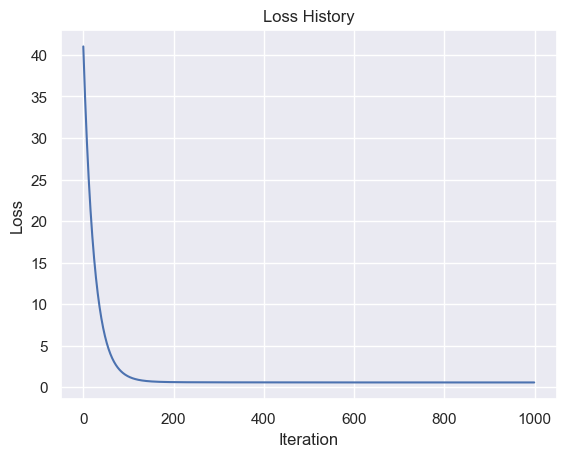

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

plt.plot(model.loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [21]:
model_stoch = LinearReg(gd_type='stochastic', tolerance=10^-6, max_iter=1000, alpha=1e-3, eta=1e-1)
model_stoch.fit(trainXc, y_train)

LinearReg(eta=0.1, gd_type='stochastic', max_iter=1000,
          w0=array([-0.85262377,  0.29068685, -1.08602652, -1.76030857,  1.61790961,
       -2.20443132, -0.22053077,  0.34313499,  0.38430556]))

In [22]:
y_pred = model_stoch.predict(testXc)
y_pred

array([6.25806697, 6.57333636, 6.50322828, ..., 6.31033233, 6.30869082,
       6.5012566 ])

Mean Squared Error (MSE): 0.5737962494020884
R2 Score: 0.05108831597086139


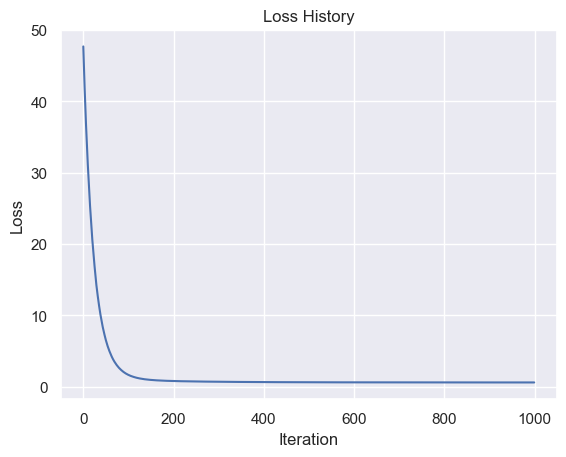

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

plt.plot(model_stoch.loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=10000, tol=10-6, alpha=1e-3, eta0=1e-2)

sgd_reg.fit(trainXc, y_train)
y_pred = sgd_reg.predict(testXc)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error (MSE): 0.5660910205905273
R2 Score: 0.06383078623801142


**Задание 4**. Обучите и провалидируйте модели на данных из предыдущего пункта, сравните качество между методами по метрикам MSE и $R^2$. Исследуйте влияние параметров `max_iter` и `eta` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

# Функция для добавления константы
def add_constant(arr):
    return np.c_[arr, np.ones((arr.shape[0], 1))]

# Подготовка данных
columns = ["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "pickup_month", "day"]
target = data["log_trip_duration"]
features = data.drop(columns=["log_trip_duration"])
train, test = train_test_split(data, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(train[columns])
X_train, X_test = scaler.transform(train[columns]), scaler.transform(test[columns])
y_train, y_test = train['log_trip_duration'], test['log_trip_duration']
trainXc = add_constant(X_train)
testXc = add_constant(X_test)

# Полный градиентный спуск
model_full = LinearReg(gd_type='full', tolerance=1e-6, max_iter=1000, alpha=1e-3, eta=1e-1)
model_full.fit(trainXc, y_train)
y_pred_full = model_full.predict(testXc)

mse_full = mean_squared_error(y_test, y_pred_full)
r2_full = r2_score(y_test, y_pred_full)

print(f'Полный Градиентный Спуск - MSE: {mse_full}, R^2: {r2_full}')

# Стохастический градиентный спуск
model_stoch = LinearReg(gd_type='stochastic', tolerance=1e-6, max_iter=1000, alpha=1e-3, eta=1e-1)
model_stoch.fit(trainXc, y_train)
y_pred_stoch = model_stoch.predict(testXc)

mse_stoch = mean_squared_error(y_test, y_pred_stoch)
r2_stoch = r2_score(y_test, y_pred_stoch)

print(f'Стохастический Градиентный Спуск - MSE: {mse_stoch}, R^2: {r2_stoch}')

# Использование SGDRegressor для сравнения
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-6, alpha=1e-3, eta0=1e-2)
sgd_reg.fit(trainXc, y_train)
y_pred_sgd = sgd_reg.predict(testXc)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f'SGDRegressor - MSE: {mse_sgd}, R^2: {r2_sgd}')

# Использование LinearRegression для полного решения
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'LinearRegression - MSE: {mse_linear}, R^2: {r2_linear}')

# Исследование влияния параметров max_iter и eta
etas = [1e-3, 1e-2, 1e-1]
max_iters = [100, 1000, 10000]

for eta in etas:
    for max_iter in max_iters:
        model_stoch = LinearReg(gd_type='stochastic', tolerance=1e-6, max_iter=max_iter, alpha=1e-3, eta=eta)
        model_stoch.fit(trainXc, y_train)
        y_pred_stoch = model_stoch.predict(testXc)
        mse_stoch = mean_squared_error(y_test, y_pred_stoch)
        r2_stoch = r2_score(y_test, y_pred_stoch)
        print(f'eta: {eta}, max_iter: {max_iter} - MSE: {mse_stoch}, R^2: {r2_stoch}')

# Визуализация истории потерь для каждого метода
plt.figure(figsize=(12, 6))
plt.plot(model_full.loss_history, label='Полный Градиентный Спуск')
plt.plot(model_stoch.loss_history, label='Стохастический Градиентный Спуск')
plt.title('История Потерь')
plt.xlabel('Итерация')
plt.ylabel('Потери')
plt.legend()
plt.show()


Полный Градиентный Спуск - MSE: 0.5744643555785729, R^2: 0.0499834398799166
Стохастический Градиентный Спуск - MSE: 0.5743109595150916, R^2: 0.050237117587069946
SGDRegressor - MSE: 0.6888887817315484, R^2: -0.13924518444105072
LinearRegression - MSE: 0.5733450686476813, R^2: 0.05183445310562318
eta: 0.001, max_iter: 100 - MSE: 39.49351629267373, R^2: -64.31213665576263
